In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.rModel(2,3)
n = mdl.dnodes
e = mdl.delems
mdl.material('default', E=1000)
mdl.xsection('default', 1e6, 50)
xt = mdl.xsection('truss', 20, 1)

mdl.node('1',  0.0, 0.0)
mdl.node('2',  6.0, 0.0)
mdl.node('3',  6.0,-8.0)
mdl.node('4', 12.0,-8.0)

mdl.beam('a', n['1'], n['2'], Qpl=[1000, 200, 200])
mdl.beam('b', n['2'], n['3'], Qpl=[1000, 240, 240])
mdl.beam('c', n['3'], n['4'], Qpl=[1000, 200, 200])
mdl.truss('d', n['1'], n['3'], xsec=xt)

e['d'].Qp['+']['1'] = e['d'].Qp['-']['1'] = 40

mdl.hinge(e['c'], n['4'])

mdl.fix(n['1'], ['x','y', 'rz'])
mdl.fix(n['4'], ['y', 'rz'])

mdl.DOF = [[7, 8, 9], [7, 1, 2], [3, 1, 4], [3, 5, 6]]

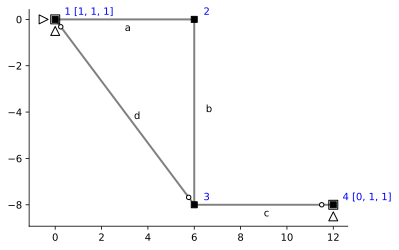

In [3]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax, labeled=True)

In [4]:
n['2'].p['y'] = -40
n['3'].p['x'] =  30

In [5]:
K = em.K_matrix(mdl)
K.f

,$1$,$2$,$3$,$4$
$P_{1}$,4752.22222,-8333.33333,-960.000,4166.66667
$P_{2}$,-8333.33333,58333.33333,-4687.500,12500.00000
$P_{3}$,-960.00000,-4687.50000,1891.875,-4687.50000
$P_{4}$,4166.66667,12500.00000,-4687.500,50000.00000


In [6]:
e['a'].ke_matrix().df

,$u_7$,$u_8$,$u_9$,$u_7$,$u_1$,$u_2$
$u_7$,0.0,0.00000,0.00000,0.0,0.00000,0.00000
$u_8$,0.0,2777.77778,8333.33333,0.0,-2777.77778,8333.33333
$u_9$,0.0,8333.33333,33333.33333,0.0,-8333.33333,16666.66667
$u_7$,0.0,0.00000,0.00000,0.0,0.00000,0.00000
$u_1$,0.0,-2777.77778,-8333.33333,0.0,2777.77778,-8333.33333
$u_2$,0.0,8333.33333,16666.66667,0.0,-8333.33333,33333.33333


In [12]:
e2e = em.solvers.Event2Event(mdl)
lamdah, Qh , *xx = e2e.run()
lamdah

0
1
2


array([0.        , 1.23402778, 2.05      , 2.05      ])

In [ ]:
A.i.ker/A.i.ker[4]

In [ ]:
em.Fs_matrix(mdl)[mdl.idx_c,:][:,mdl.idx_c]

In [ ]:
e['c'].f_matrix().c

In [ ]:
e2e.Af0

In [ ]:
mdl.basic_forces

In [ ]:
em.A_matrix(mdl)

In [ ]:
mdl.triv_forces

In [ ]:
mdl.idx_c